## Word2Vec

In [1]:
import nltk
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure

Punkt Sentence Tokenizer

This tokenizer divides a text into a list of sentences
by using an unsupervised algorithm to build a model for abbreviation
words, collocations, and words that start sentences.  It must be
trained on a large collection of plaintext in the target language
before it can be used.

In [2]:
# Punctuation and Tokenizer module
nltk.download('punkt')

The Gutenberg dataset. A set of 18 books we can used
to train upon.

In [3]:
nltk.download('gutenberg')
from nltk.corpus import gutenberg

[nltk_data] Downloading package gutenberg to
[nltk_data]     /home/born-2-code/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [4]:
from nltk.corpus import gutenberg

In [5]:
print(gutenberg.fileids())

[u'austen-emma.txt', u'austen-persuasion.txt', u'austen-sense.txt', u'bible-kjv.txt', u'blake-poems.txt', u'bryant-stories.txt', u'burgess-busterbrown.txt', u'carroll-alice.txt', u'chesterton-ball.txt', u'chesterton-brown.txt', u'chesterton-thursday.txt', u'edgeworth-parents.txt', u'melville-moby_dick.txt', u'milton-paradise.txt', u'shakespeare-caesar.txt', u'shakespeare-hamlet.txt', u'shakespeare-macbeth.txt', u'whitman-leaves.txt']


Load sentences

In [6]:
gberg_sents = gutenberg.sents()

In [21]:
print(len(gberg_sents))
gberg_sents[100:102]

98552


[u'Emma',
 u'by',
 u'Jane',
 u'Austen',
 u'1816',
 u']',
 u'VOLUME',
 u'I',
 u'CHAPTER']

In [8]:
# sentence : list of word
# sentences : list of sentence
model = Word2Vec(sentences=gberg_sents, size=64, sg=1, window=10, min_count=5, seed=42, workers=2)

In [9]:
print(model['house'])
print(model.most_similar('house'))
print(model.most_similar('day'))
print(model.most_similar('father'))

[-0.11702433  0.41827545  0.29891893  0.05923541 -0.06077962  0.22409847
  0.15310808 -0.79448646 -0.21712673 -0.31292778 -0.38656148  0.13613969
  0.11267313 -0.1245007   0.50290465 -0.22850008  0.13010582  0.5089107
 -0.04131333  0.07642906  0.21168886 -0.44553846  0.01113775  0.19234811
 -0.3565238   0.2651823  -0.41000563 -0.05788407 -0.46851435  0.30560192
 -0.00960675  0.28561947  0.1985229  -0.20879334 -0.25273034 -0.42779115
 -0.31483254 -0.1358315   0.12523158 -0.12990545  0.08281328 -0.12696315
  0.31456983 -0.12039775  0.28315017 -0.4087876  -0.64587677 -0.28173822
  0.4850828  -0.42092925  0.0468488  -0.19462949 -0.68163306 -0.06549999
  0.14986506 -0.45628798  0.0433285  -0.01662179  0.14800273  0.32201564
 -0.02471933  0.25499395  0.14228857 -0.6347458 ]
[(u'court', 0.7164552211761475), (u'temple', 0.7043197154998779), (u'chamber', 0.7041787505149841), (u'city', 0.7002893090248108), (u'palace', 0.6816650032997131), (u'chamberlain', 0.6803564429283142), (u'breaches', 0.669

/home/born-2-code/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/home/born-2-code/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python2.7/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/home/born-2-code/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoi

Similarities

In [10]:
print(model.similarity('father', 'house'))
print(model.similarity('father', 'mother'))

0.5399578
0.8696948


/home/born-2-code/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/home/born-2-code/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


Arithmatics

In [11]:
# father - man + woman = mother
print(model.most_similar(positive=['father', 'woman'],
                         negative=['man']))
# king - man + woman = queen (although due to the corpus we have,
# it appears in the 11th position, but notice that there are many
# women in the top 10.
model.most_similar(positive=['king', 'woman'], negative=['man'], topn=30)

[(u'sister', 0.7965863943099976), (u'daughter', 0.7733699083328247), (u'mother', 0.7722124457359314), (u'wife', 0.7488061785697937), (u'husband', 0.734039306640625), (u'brother', 0.7127001881599426), (u'Sarah', 0.7031304836273193), (u'Sarai', 0.6929229497909546), (u'Tamar', 0.6859511733055115), (u'conceived', 0.6842162013053894)]


/home/born-2-code/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/born-2-code/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


[(u'Sarah', 0.7137025594711304),
 (u'Rachel', 0.6985112428665161),
 (u'Judah', 0.689051628112793),
 (u'Solomon', 0.6885676383972168),
 (u'Leah', 0.6861811876296997),
 (u'Sarai', 0.662503182888031),
 (u'Hagar', 0.6610445380210876),
 (u'Bethuel', 0.6607368588447571),
 (u'Laban', 0.6602643728256226),
 (u'daughter', 0.659034013748169),
 (u'David', 0.6582670211791992),
 (u'damsel', 0.6543081998825073),
 (u'Rebekah', 0.646663248538971),
 (u'Bilhah', 0.6455941796302795),
 (u'Abram', 0.6451974511146545),
 (u'queen', 0.6425789594650269),
 (u'tribute', 0.6418164372444153),
 (u'Padanaram', 0.6410499811172485),
 (u'princes', 0.6401115655899048),
 (u'Pharaoh', 0.639563262462616),
 (u'birthright', 0.6371167898178101),
 (u'Ephron', 0.6369098424911499),
 (u'Hamor', 0.632664144039154),
 (u'Zilpah', 0.6273905634880066),
 (u'ministered', 0.624951958656311),
 (u'Esther', 0.6238771677017212),
 (u'Joseph', 0.6236385703086853),
 (u'Mephibosheth', 0.6190445423126221),
 (u'Canaan', 0.6164143681526184),
 (u'Han

t-SNE

In [13]:
tsne = TSNE(n_components=2, n_iter=250)
X = model[model.wv.vocab]
X_2d = tsne.fit_transform(X)
coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['token'] = model.wv.vocab.keys()
print(coords_df.head())

coords_df.plot.scatter('x', 'y', figsize=(8,8),
                       marker='o', s=10, alpha=0.2)

/home/born-2-code/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


          x         y   token
0  0.008783  0.122080  realms
1 -0.566448 -0.118140    Doeg
2  0.047781 -0.046248    both
3 -0.008253  0.768045  yellow
4 -0.734393  0.180844    four


In [14]:
%matplotlib inline

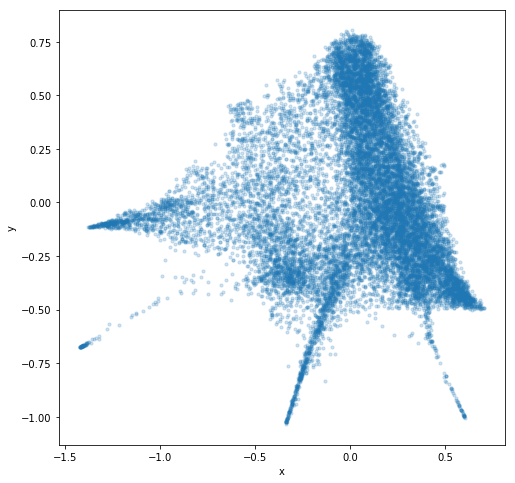

In [15]:
coords_df.plot.scatter('x', 'y', figsize=(8,8), marker='o', s=10, alpha=0.2)

## Doc2Vec

In [22]:
from gensim.test.utils import common_texts

In [24]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [25]:
documents

[TaggedDocument(words=['human', 'interface', 'computer'], tags=[0]),
 TaggedDocument(words=['survey', 'user', 'computer', 'system', 'response', 'time'], tags=[1]),
 TaggedDocument(words=['eps', 'user', 'interface', 'system'], tags=[2]),
 TaggedDocument(words=['system', 'human', 'system', 'eps'], tags=[3]),
 TaggedDocument(words=['user', 'response', 'time'], tags=[4]),
 TaggedDocument(words=['trees'], tags=[5]),
 TaggedDocument(words=['graph', 'trees'], tags=[6]),
 TaggedDocument(words=['graph', 'minors', 'trees'], tags=[7]),
 TaggedDocument(words=['graph', 'minors', 'survey'], tags=[8])]

In [27]:
model.infer_vector(["system", "response"])

array([-0.00349501, -0.06090447, -0.07299673,  0.04204015,  0.01652598],
      dtype=float32)